In [146]:
%load_ext autoreload
%autoreload 2

In [147]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def get_result(name):
    acc_curve = []
    auc_curve = []
    feature_curve = []
    for i in range(1,6):
        with open(f'./result/{name}_{i}.pkl','rb') as file:
            i_th_result = pickle.load(file)
            acc_curve.append(i_th_result['acc'])
            auc_curve.append(i_th_result['auc'])
            feature_curve.append(i_th_result['feat'])
    return acc_curve, auc_curve, feature_curve

In [3]:
def get_result_feature_nn(name):
    acc_curve = []
    auc_curve = []
    repeat_times = 6 if name=='feature_DT_results' else 2
    for i in range(1,repeat_times):
        with open(f'./result/{name}_{i}.pkl','rb') as file:
            i_th_result = pickle.load(file)
            acc_curve.append(i_th_result['acc'])
            auc_curve.append(i_th_result['auc'])
            # feature_curve.append(i_th_result['feat'])
    return acc_curve, auc_curve

In [4]:

with open(f'./result/feature_DT_results_{2}.pkl','rb') as file:
    i_th_result = pickle.load(file)
    print(i_th_result['acc'])
    print(i_th_result['auc'])
    # feature_curve.append(i_th_result['feat'])

[0.7314608045811822, 0.7284013398631395, 0.7313253811203113, 0.7363885603104238, 0.7169483843151995, 0.725330820168699, 0.7257978929214985, 0.7178079087301148]
[0.760307383618736, 0.7638684678908211, 0.7688058967244104, 0.7898448986811413, 0.7785094022574262, 0.7867370684413588, 0.7779055241717059, 0.7620112318560199]


# post XAI result

In [5]:
name = 'Deep Lift'
DL_acc, DL_auc, DL_feat = get_result(name)

In [6]:
name = 'Feature Ablation'
FA_acc, FA_auc, FA_feat = get_result(name)

In [7]:
name = 'Integrated Gradients'
IG_acc, IG_auc, IG_feat = get_result(name)

In [8]:
name = 'Saliency'
SA_acc, SA_auc, SA_feat = get_result(name)

In [9]:
name = 'linear'
Linear_acc, Linear_auc, Linear_feat = get_result(name)

In [10]:
name = 'DT'
DT_acc, DT_auc, DT_feat = get_result(name)

In [11]:
name = 'SVM'
SVM_acc, SVM_auc, SVM_feat = get_result(name)

In [12]:
name = 'feature_linear_results'
lin_nn_acc, lin_nn_auc = get_result_feature_nn(name)

In [13]:
name = 'feature_SVM_results'
SVM_nn_acc, SVM_nn_auc = get_result_feature_nn(name)

In [14]:
name = 'feature_DT_results'
DT_nn_acc, DT_nn_auc = get_result_feature_nn(name)

In [15]:
SVM_feat[0][-1]

array([ 13,  16, 276])

In [16]:
arrays = [DL_feat, FA_feat, IG_feat, SA_feat,Linear_feat,DT_feat,SVM_feat]
labels = ['DL', 'FA', 'IG', 'SA','Linear','DT','SVM']
for i in range(len(arrays)):
    for j in range(0,5):
        # print(labels[i])
        method = arrays[i]
        print(f'{labels[i]},{j+1}s attempt,feat: {method[j][-1]}')

DL,1s attempt,feat: [  1  62 193]
DL,2s attempt,feat: [ 0  1 79]
DL,3s attempt,feat: [ 0  1 62]
DL,4s attempt,feat: [ 0  1 62]
DL,5s attempt,feat: [ 0  1 62]
FA,1s attempt,feat: [ 1 23 62]
FA,2s attempt,feat: [ 0  1 62]
FA,3s attempt,feat: [ 0  1 62]
FA,4s attempt,feat: [ 1 62 79]
FA,5s attempt,feat: [ 1 23 62]
IG,1s attempt,feat: [ 1 24 62]
IG,2s attempt,feat: [ 1 62 76]
IG,3s attempt,feat: [ 0  1 62]
IG,4s attempt,feat: [ 1 63 79]
IG,5s attempt,feat: [ 1 62 63]
SA,1s attempt,feat: [329 330 331]
SA,2s attempt,feat: [190 331 341]
SA,3s attempt,feat: [175 331 341]
SA,4s attempt,feat: [190 329 331]
SA,5s attempt,feat: [328 331 364]
Linear,1s attempt,feat: [263 284 368]
Linear,2s attempt,feat: [263 284 368]
Linear,3s attempt,feat: [263 284 368]
Linear,4s attempt,feat: [263 284 368]
Linear,5s attempt,feat: [263 284 368]
DT,1s attempt,feat: [  1 182 368]
DT,2s attempt,feat: [  1 182 368]
DT,3s attempt,feat: [  1 182 368]
DT,4s attempt,feat: [  1 182 368]
DT,5s attempt,feat: [  1 182 368]
SV

In [90]:
cmap = matplotlib.colormaps['Dark2']

In [130]:
x_axis = np.array([369,185,93,47,24,12,6,3])

In [148]:
def plot_multiple_with_error_bars(datasets, xlabel='X axis', ylabel='Y axis', title=None):
    """
    Draw a line plot with multiple datasets, each having error bars at specified important points.

    Parameters:
        datasets (list of dicts): Each dict in the list should contain:
                                  - 'x': array-like, x values
                                  - 'y': array-like, y values
                                  - 'important_indices': array-like, indices for error bars
                                  - 'errors': array-like, error values
                                  - 'label': str, label for the dataset
                                  - 'color': str, color for the plot elements
        title (str): Title of the plot.
        xlabel (str): Label for the X axis.
        ylabel (str): Label for the Y axis.

    Usage:
        datasets = [
            {'x': np.linspace(0, 10, 50), 'y': np.sin(np.linspace(0, 10, 50)), 'important_indices': np.arange(0, 50, 5),
             'errors': np.random.normal(0.1, 0.02, 10), 'label': 'Sine Wave', 'color': 'red'},
            {'x': np.linspace(0, 10, 50), 'y': np.cos(np.linspace(0, 10, 50)), 'important_indices': np.arange(0, 50, 5),
             'errors': np.random.normal(0.1, 0.02, 10), 'label': 'Cosine Wave', 'color': 'blue'}
        ]
        plot_multiple_with_error_bars(datasets)
    """
    # Create the plot
    fig, ax = plt.subplots(figsize=(9, 6))
    
    for dataset in datasets:
        x = dataset['x']
        y = dataset['y']
        errors = dataset['errors']
        label = dataset['label']
        color = dataset['color']
        linestyle = dataset['linestyle']
        
        # Line plot with markers at each point
        ax.plot(x, y, label=label, marker='o', color=color, linestyle=linestyle)

        # Add error bars at important points
        ax.errorbar(x, y, yerr=errors, fmt='o', capsize=5, color=color, linestyle=linestyle)

    # Customizing the plot
    plt.gca().invert_xaxis()
    plt.xscale('log')
    plt.xticks(x, labels=[str(val) for val in x], fontsize="18")
    plt.yticks(fontsize="18")
    plt.xlabel(xlabel, fontsize="24")
    plt.ylabel(ylabel, fontsize="24")
    plt.legend(loc='best', fontsize="18")
    plt.grid(True)

    # Show the plot
    plt.savefig(title+'.png', dpi=300)

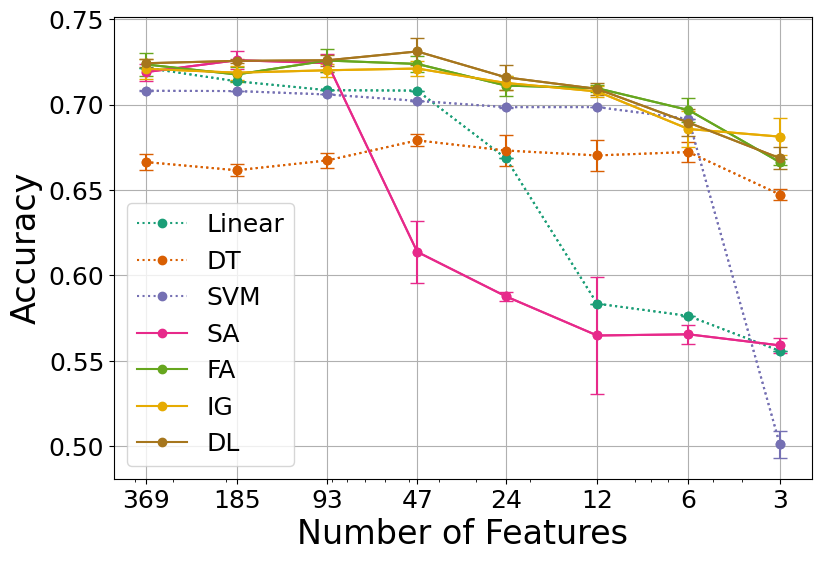

In [149]:
# Example usage
datasets = [
    {'x': x_axis, 'y': np.array(Linear_acc).mean(axis=0), 'errors': np.array(Linear_acc).std(axis=0), 
     'label': 'Linear', 'color': cmap.colors[0], 'linestyle': 'dotted'},
    {'x': x_axis, 'y': np.array(DT_acc).mean(axis=0), 'errors': np.array(DT_acc).std(axis=0), 
     'label': 'DT', 'color': cmap.colors[1], 'linestyle': 'dotted'},
    {'x': x_axis, 'y': np.array(SVM_acc).mean(axis=0), 'errors': np.array(SVM_acc).std(axis=0), 
     'label': 'SVM', 'color': cmap.colors[2], 'linestyle': 'dotted'},
    {'x': x_axis, 'y': np.array(SA_acc).mean(axis=0), 'errors': np.array(SA_acc).std(axis=0), 
     'label': 'SA', 'color': cmap.colors[3], 'linestyle': 'solid'},
    {'x': x_axis, 'y': np.array(FA_acc).mean(axis=0), 'errors': np.array(FA_acc).std(axis=0), 
     'label': 'FA', 'color': cmap.colors[4], 'linestyle': 'solid'},
    {'x': x_axis, 'y': np.array(IG_acc).mean(axis=0), 'errors': np.array(IG_acc).std(axis=0), 
     'label': 'IG', 'color': cmap.colors[5], 'linestyle': 'solid'},
    {'x': x_axis, 'y': np.array(DL_acc).mean(axis=0), 'errors': np.array(DL_acc).std(axis=0), 
     'label': 'DL', 'color': cmap.colors[6], 'linestyle': 'solid'},
]
plot_multiple_with_error_bars(datasets, 'Number of Features', 'Accuracy', 'rfe_acc')

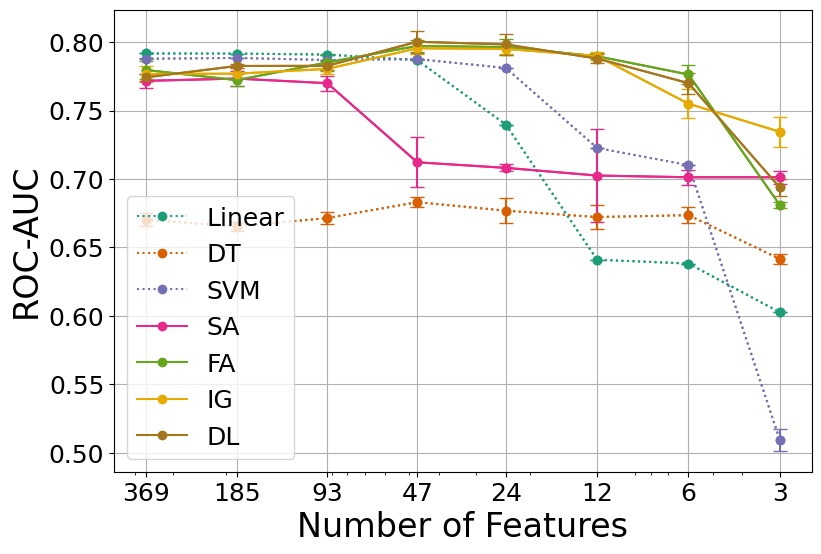

In [150]:
# Example usage
datasets = [
    {'x': x_axis, 'y': np.array(Linear_auc).mean(axis=0), 'errors': np.array(Linear_acc).std(axis=0), 
     'label': 'Linear', 'color': cmap.colors[0], 'linestyle': 'dotted'},
    {'x': x_axis, 'y': np.array(DT_auc).mean(axis=0), 'errors': np.array(DT_acc).std(axis=0), 
     'label': 'DT', 'color': cmap.colors[1], 'linestyle': 'dotted'},
    {'x': x_axis, 'y': np.array(SVM_auc).mean(axis=0), 'errors': np.array(SVM_acc).std(axis=0), 
     'label': 'SVM', 'color': cmap.colors[2], 'linestyle': 'dotted'},
    {'x': x_axis, 'y': np.array(SA_auc).mean(axis=0), 'errors': np.array(SA_acc).std(axis=0), 
     'label': 'SA', 'color': cmap.colors[3], 'linestyle': 'solid'},
    {'x': x_axis, 'y': np.array(FA_auc).mean(axis=0), 'errors': np.array(FA_acc).std(axis=0), 
     'label': 'FA', 'color': cmap.colors[4], 'linestyle': 'solid'},
    {'x': x_axis, 'y': np.array(IG_auc).mean(axis=0), 'errors': np.array(IG_acc).std(axis=0), 
     'label': 'IG', 'color': cmap.colors[5], 'linestyle': 'solid'},
    {'x': x_axis, 'y': np.array(DL_auc).mean(axis=0), 'errors': np.array(DL_acc).std(axis=0), 
     'label': 'DL', 'color': cmap.colors[6], 'linestyle': 'solid'},
]
plot_multiple_with_error_bars(datasets, 'Number of Features', 'ROC-AUC', 'rfe_auc')

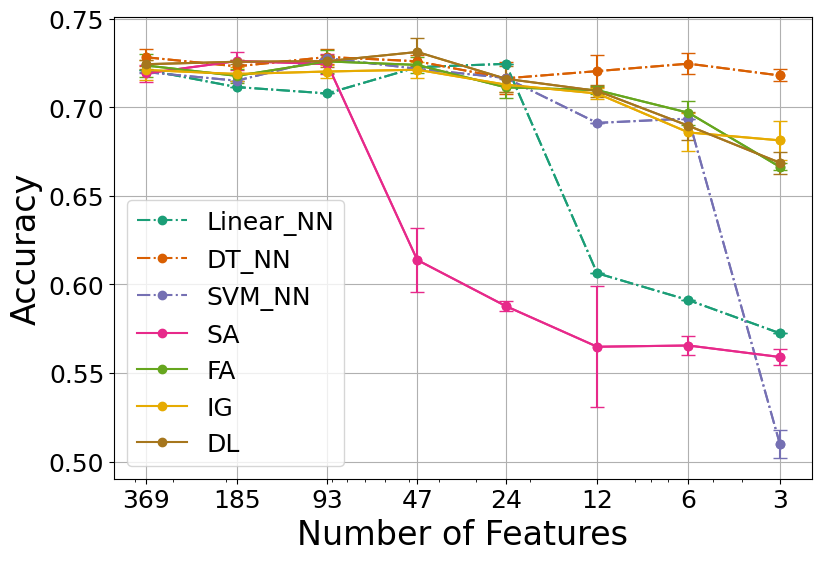

In [178]:
# Example usage
datasets = [
    {'x': x_axis, 'y': np.array(lin_nn_acc).mean(axis=0), 'errors': np.array(Linear_acc).std(axis=0), 
     'label': 'Linear_NN', 'color': cmap.colors[0], 'linestyle': 'dashdot'},
    {'x': x_axis, 'y': np.array(DT_nn_acc).mean(axis=0), 'errors': np.array(DT_acc).std(axis=0), 
     'label': 'DT_NN', 'color': cmap.colors[1], 'linestyle': 'dashdot'},
    {'x': x_axis, 'y': np.array(SVM_nn_acc).mean(axis=0), 'errors': np.array(SVM_acc).std(axis=0), 
     'label': 'SVM_NN', 'color': cmap.colors[2], 'linestyle': 'dashdot'},
    {'x': x_axis, 'y': np.array(SA_acc).mean(axis=0), 'errors': np.array(SA_acc).std(axis=0), 
     'label': 'SA', 'color': cmap.colors[3], 'linestyle': 'solid'},
    {'x': x_axis, 'y': np.array(FA_acc).mean(axis=0), 'errors': np.array(FA_acc).std(axis=0), 
     'label': 'FA', 'color': cmap.colors[4], 'linestyle': 'solid'},
    {'x': x_axis, 'y': np.array(IG_acc).mean(axis=0), 'errors': np.array(IG_acc).std(axis=0), 
     'label': 'IG', 'color': cmap.colors[5], 'linestyle': 'solid'},
    {'x': x_axis, 'y': np.array(DL_acc).mean(axis=0), 'errors': np.array(DL_acc).std(axis=0), 
     'label': 'DL', 'color': cmap.colors[6], 'linestyle': 'solid'},
]
plot_multiple_with_error_bars(datasets, 'Number of Features', 'Accuracy', 'rfe_nn_acc')

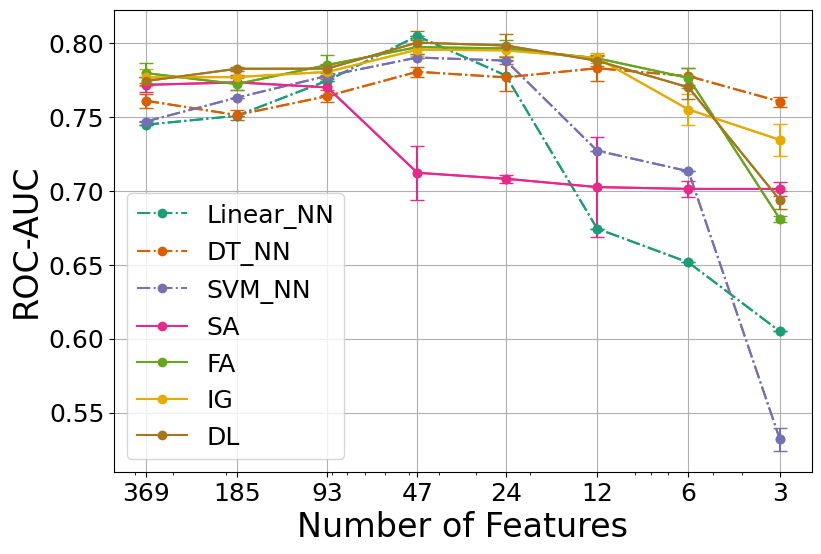

In [179]:
# Example usage
datasets = [
    {'x': x_axis, 'y': np.array(lin_nn_auc).mean(axis=0), 'errors': np.array(Linear_acc).std(axis=0), 
     'label': 'Linear_NN', 'color': cmap.colors[0], 'linestyle': 'dashdot'},
    {'x': x_axis, 'y': np.array(DT_nn_auc).mean(axis=0), 'errors': np.array(DT_acc).std(axis=0), 
     'label': 'DT_NN', 'color': cmap.colors[1], 'linestyle': 'dashdot'},
    {'x': x_axis, 'y': np.array(SVM_nn_auc).mean(axis=0), 'errors': np.array(SVM_acc).std(axis=0), 
     'label': 'SVM_NN', 'color': cmap.colors[2], 'linestyle': 'dashdot'},
    {'x': x_axis, 'y': np.array(SA_auc).mean(axis=0), 'errors': np.array(SA_acc).std(axis=0), 
     'label': 'SA', 'color': cmap.colors[3], 'linestyle': 'solid'},
    {'x': x_axis, 'y': np.array(FA_auc).mean(axis=0), 'errors': np.array(FA_acc).std(axis=0), 
     'label': 'FA', 'color': cmap.colors[4], 'linestyle': 'solid'},
    {'x': x_axis, 'y': np.array(IG_auc).mean(axis=0), 'errors': np.array(IG_acc).std(axis=0), 
     'label': 'IG', 'color': cmap.colors[5], 'linestyle': 'solid'},
    {'x': x_axis, 'y': np.array(DL_auc).mean(axis=0), 'errors': np.array(DL_acc).std(axis=0), 
     'label': 'DL', 'color': cmap.colors[6], 'linestyle': 'solid'},
]
plot_multiple_with_error_bars(datasets, 'Number of Features', 'ROC-AUC', 'rfe_nn_auc')

In [162]:
def get_time(name):
    time_curve = []
    for i in range(1,6):
        with open(f'./result/{name}_{i}.pkl','rb') as file:
            i_th_result = pickle.load(file)
            time_curve.append(i_th_result['time'])
    return time_curve

In [163]:
name = 'SVM'
SVM_time = get_time(name)
print(len(SVM_time))

5


DL
FA
IG
SA
Linear
DT
SVM
Linear_NN
[[0.7211382203698995, 0.7113683849784981, 0.7077616989287727, 0.7226085322307836, 0.7244630045214854, 0.6063157080159634, 0.5911427529102226, 0.5724708977746332]]
SVM_NN
[[0.719808859458085, 0.7149612523077263, 0.7276053815625103, 0.7216937329338802, 0.7164840753064993, 0.6911350144267442, 0.6935947466752159, 0.5100379185690438]]
DT_NN


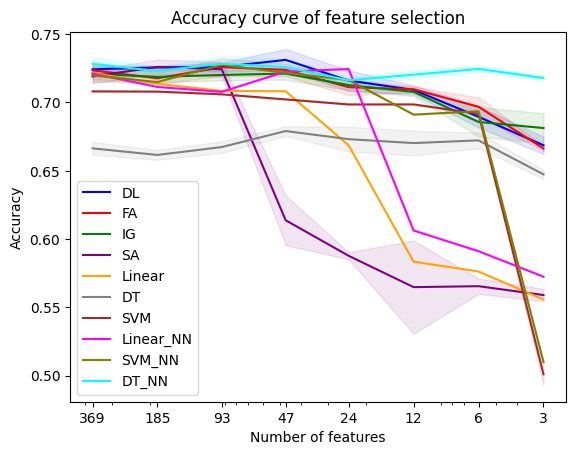

In [19]:
x = np.array([369,185,93,47,24,12,6,3])
arrays = [DL_acc, FA_acc, IG_acc, SA_acc,Linear_acc,DT_acc,SVM_acc,lin_nn_acc,SVM_nn_acc,DT_nn_acc]
colors = ['blue','red','green','purple','orange','gray','brown','magenta','olive','cyan']
labels = ['DL', 'FA', 'IG', 'SA','Linear','DT','SVM','Linear_NN','SVM_NN','DT_NN']
for i in range(len(arrays)):

    print(labels[i])
    if labels[i]=='Linear_NN' or labels[i]=='SVM_NN':
        print(arrays[i])
        mean = np.squeeze(arrays[i])
        std = 0
    else:
        stacked_arrays = np.vstack(arrays[i])
        mean = np.mean(stacked_arrays, axis=0)
        std = np.std(stacked_arrays, axis=0)
    
    plt.plot(x, mean, label=labels[i], color=colors[i])
    plt.fill_between(x, mean - std, mean + std, color=colors[i], alpha=0.1)
# Set the x-axis to logarithmic scale
plt.xscale('log')

# Set the x-ticks to specific values
plt.xticks(x, labels=[str(val) for val in x])
plt.gca().invert_xaxis()
plt.legend()
plt.title('Accuracy curve of feature selection')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.savefig('ACC_curve.png',dpi=300)

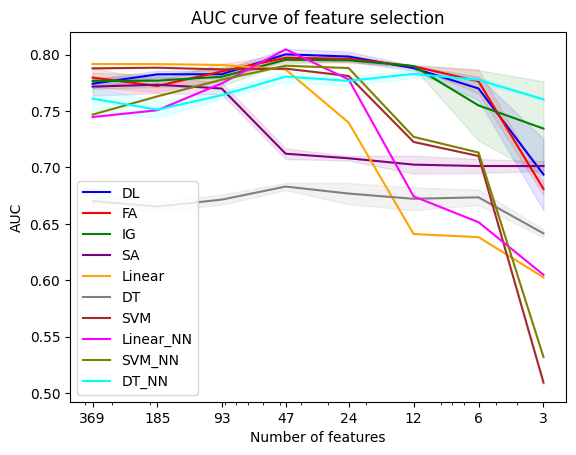

In [20]:
x = np.array([369,185,93,47,24,12,6,3])
arrays = [DL_auc, FA_auc, IG_auc, SA_auc, Linear_auc, DT_auc,SVM_auc,lin_nn_auc,SVM_nn_auc,DT_nn_auc]
colors = ['blue','red','green','purple','orange','gray','brown','magenta','olive','cyan']
labels = ['DL', 'FA', 'IG', 'SA','Linear','DT','SVM','Linear_NN','SVM_NN','DT_NN']
for i in range(len(arrays)):
    stacked_arrays = np.vstack(arrays[i])
    mean = np.mean(stacked_arrays, axis=0)
    if labels[i]=='Linear_NN' or labels[i]=='SVM_NN':
        std = 0
    else:
        std = np.std(stacked_arrays, axis=0)

    plt.plot(x, mean, label=labels[i], color=colors[i])
    plt.fill_between(x, mean - std, mean + std, color=colors[i], alpha=0.1)
# Set the x-axis to logarithmic scale
plt.xscale('log')

# Set the x-ticks to specific values
plt.xticks(x, labels=[str(val) for val in x])
plt.gca().invert_xaxis()
plt.title('AUC curve of feature selection')
plt.xlabel('Number of features')
plt.ylabel('AUC')
plt.legend()
plt.savefig('AUC_curve.png',dpi=300)

# Simulation results

In [164]:
def get_result(formula_id,method_name,repeat_id):

    with open(f'./result_simulation/{formula_id}_{method_name}_{repeat_id}.pkl','rb') as file:
        i_th_result = pickle.load(file)
        score_curve = i_th_result['score']
        precision_curve = i_th_result['precision']
        recall_curve = i_th_result['recall']
        feature_curve = i_th_result['feat']
        time = i_th_result['time']
    return score_curve, precision_curve, recall_curve, feature_curve, time

In [166]:
# method_name = 'linear'
repeat_id = '1'
rows = []
for formula_id in range(10,15):
    for method_name in ['linear','DT','SVM','Saliency','Feature Ablation','Integrated Gradients', 'Deep Lift']:
        score_curve, precision_curve, recall_curve, feature_curve,time = get_result(formula_id,method_name,repeat_id)
        # print(score_curve, precision_curve, recall_curve,time)
        score = score_curve[-1]
        precision = precision_curve[-1]
        recall = recall_curve[-1]
        rows.append([formula_id,method_name,score,precision,recall,time])

In [167]:
rows

[[10, 'linear', 0.08720692756830928, 0.5, 0.5, 0.1665952205657959],
 [10,
  'DT',
  0.05355254201778273,
  0.8333333333333334,
  0.8333333333333334,
  14.19163179397583],
 [10,
  'SVM',
  0.0896865667649549,
  0.8333333333333334,
  0.8333333333333334,
  107.57854580879211],
 [10, 'Saliency', 0.009553560582904248, 1.0, 1.0, 634.5602495670319],
 [10,
  'Feature Ablation',
  0.01358695879847193,
  0.8333333333333334,
  0.8333333333333334,
  624.2333960533142],
 [10,
  'Integrated Gradients',
  0.013134264098680142,
  0.8333333333333334,
  0.8333333333333334,
  640.3819222450256],
 [10, 'Deep Lift', 0.009568652147894305, 1.0, 1.0, 632.0580806732178],
 [11,
  'linear',
  0.09992155834826483,
  0.42857142857142855,
  0.42857142857142855,
  0.15813875198364258],
 [11,
  'DT',
  0.05820271441300855,
  0.7142857142857143,
  0.7142857142857143,
  14.830827713012695],
 [11,
  'SVM',
  0.10180881403057529,
  0.2857142857142857,
  0.2857142857142857,
  129.85399389266968],
 [11, 'Saliency', 0.01229

In [168]:

columns = ['Formula_ID', 'Method Name', 'MAE score', 'precision', 'recall', 'time']

# Create a DataFrame
df = pd.DataFrame(rows, columns=columns)


In [169]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [171]:
df.head()

,Formula_ID,Method Name,MAE score,precision,recall,time
0,10,linear,0.087,0.500,0.500,0.167
1,10,DT,0.054,0.833,0.833,14.192
2,10,SVM,0.090,0.833,0.833,107.579
3,10,Saliency,0.010,1.000,1.000,634.560
4,10,Feature Ablation,0.014,0.833,0.833,624.233


In [204]:
df.to_csv('simulation_table.csv')

In [177]:
np.log(1+0.014)

0.013902905168991434